In [1]:
import loompy
ds=loompy.connect("MyTissue.loom")
ds

,,,,,,CellID,MyTissue:A10_unique.bam,MyTissue:A11_unique.bam,MyTissue:A12_unique.bam,MyTissue:A13_unique.bam,MyTissue:A14_unique.bam,MyTissue:A15_unique.bam,MyTissue:A16_unique.bam,MyTissue:A17_unique.bam,MyTissue:A18_unique.bam,MyTissue:A19_unique.bam,...
Accession,Chromosome,End,Gene,Start,Strand,,,,,,,,,,,,...
ENSMUSG00000051951.6,1,3741721,Xkr4,3276124,-,,21.0,0.0,11.0,10.0,85.0,0.0,11.0,0.0,0.0,0.0,...
ENSMUSG00000103377.2,1,3438772,Gm37180,3435954,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000104017.2,1,3448011,Gm37363,3445779,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103025.2,1,3537508,Gm37686,3535200,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103201.2,1,3584730,Gm37329,3582674,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000103161.2,1,3666126,Gm38148,3663115,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000102331.2,1,3729127,Gm19938,3717532,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000088333.4,1,3854156,Gm27396,3854099,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...
ENSMUSG00000102343.2,1,4056438,Gm37381,3975962,-,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...


In [2]:
import scvelo as scv

In [3]:
adata = scv.read('MyTissue.loom', cache=True)
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


AnnData object with n_obs × n_vars = 384 × 55357
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced'

In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 44918 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


In [7]:
adata.var_names_make_unique()

In [8]:
adata = scv.read('MyTissue.loom', cache=True)
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 384 × 55357
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'

In [9]:
scv.pp.moments(adata, n_neighbors=30, n_pcs=30)

Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:00:17) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [10]:
scv.tl.velocity(adata, mode='steady_state')

computing velocities
    finished (0:00:07) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [11]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/40 cores)


  0%|          | 0/4372 [00:00<?, ?gene/s]

    finished (0:13:18) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [12]:
scv.tl.velocity(adata, mode='dynamical')

computing velocities
    finished (0:00:09) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [13]:
adata

AnnData object with n_obs × n_vars = 384 × 55357
    obs: 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'fit_r2'
    uns: 'pca', 'neighbors', 'velocity_params', 'recover_dynamics'
    obsm: 'X_pca'
    varm: 'PCs', 'loss'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'fit_t', 'fit_tau', 'fit_tau_', 'velocity_u'
    obsp: 'distances', 'connectivities'

速率通过将它们转换成可能的细胞转换投射到低维嵌入中。即，对于每个速率矢量，我们发现符合该方向的可能的细胞过渡。一个细胞过渡到另一个细胞的概率是使用（潜在细胞过渡和速率矢量之间）余弦值相关性计算的，并存储在矩阵中，使用速率图展示：

In [15]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/40 cores)


  0%|          | 0/384 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


最后，为了增强鲁棒性，通过将基因共享的潜伏时间过程与其邻域卷积进行回归，我们检测出不一致的时间点，并将其替换为其卷积。

In [16]:
scv.tl.recover_latent_time(adata)

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:03) --> added 
    'latent_time', shared time (adata.obs)


速率被投影到任何嵌入，通过basis指定，并以以下方式之一可视化： 细胞水平 scv.pl.velocity_embedding， 网格线scv.pl.velocity_embedding_grid 流线型scv.pl.velocity_embedding_stream

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


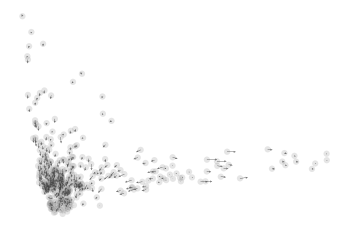

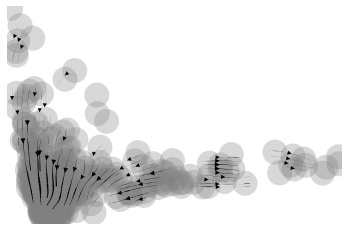

In [19]:
scv.pl.velocity_embedding(adata, basis='pca')
scv.pl.velocity_embedding_stream(adata, basis='pca')

流线显示的速率矢量可对发育过程进行详细分析。它准确地勾画了导管细胞和内分泌祖细胞的循环。此外，它阐明了细胞的谱系命运、细胞周期回归和内分泌细胞分化状态。

在单细胞水平上获得的速率矢量的最详细分辨率，每个箭头显示单个细胞运动的方向和速率。这揭示了 Ngn3 细胞（黄色）的早期内分泌命运，以及近端α细胞（蓝色）和瞬态β细胞（绿色）之间的明显差异。

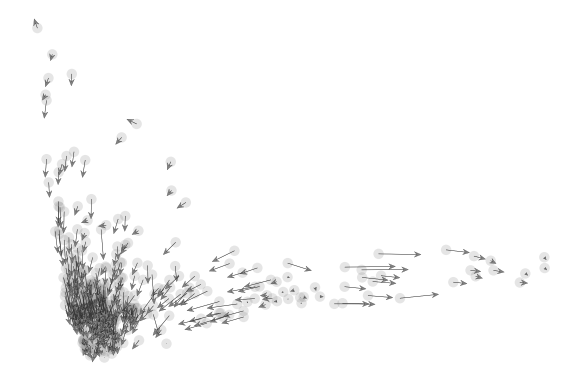

In [20]:
scv.pl.velocity_embedding(adata, arrow_length=3, arrow_size=2, dpi=120)

用随机模型计算速度

In [21]:
scv.tl.velocity(adata, mode='stochastic')

computing velocities
    finished (0:00:09) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


速率图和伪时间
我们可以可视化速率图，以描绘所有速率推断的细胞到细胞连接/过渡。它可以通过设置 threshold.限制在高概率转换。例如，该图指示来自早期和晚期内分泌细胞的 Epsilon 细胞产生的两个阶段。

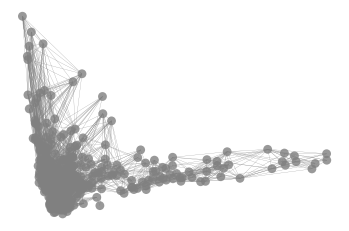

In [22]:
scv.pl.velocity_graph(adata, threshold=.1)